In [2]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Definindo o valor das seeds para garantir reprodutibilidade

RANDOM_SEED = 42

os.environ['PYTHONHASHSEED']=str(RANDOM_SEED)

random.seed(RANDOM_SEED)

np.random.seed(RANDOM_SEED)

In [4]:
# Carregar os dados de treino e teste
mitbih_train = pd.read_csv('mitbih_test.csv', header=None)
mitbih_test = pd.read_csv('mitbih_train.csv', header=None)

# Separar os conjuntos de treino e teste 
x_train = mitbih_train.iloc[:, :-1].values
y_train = mitbih_train.iloc[:, -1].values
x_test = mitbih_test.iloc[:, :-1].values
y_test = mitbih_test.iloc[:, -1].values

In [6]:
RandomForest = RandomForestClassifier()

RandomForest.fit(x_train, y_train)

y_pred = RandomForest.predict(x_test)

In [34]:
# Gerar relatório de classificação
report = classification_report(y_test, y_pred, target_names=['Classe 1', 'Classe 2', 'Classe 3', 'Classe 4', 'Classe 5'])
print(f'Relatório de Classificação RandomForest:\n{report}')
cm = confusion_matrix(y_test, y_pred)

Relatório de Classificação RandomForest:
              precision    recall  f1-score   support

    Classe 1       0.97      1.00      0.98     72471
    Classe 2       0.97      0.57      0.72      2223
    Classe 3       0.97      0.84      0.90      5788
    Classe 4       0.94      0.45      0.60       641
    Classe 5       0.99      0.92      0.96      6431

    accuracy                           0.97     87554
   macro avg       0.97      0.76      0.83     87554
weighted avg       0.97      0.97      0.97     87554



Matriz de Confusão RandomForest:
[[72347    34    66     6    18]
 [  931  1260    28     0     4]
 [  860     2  4876    13    37]
 [  302     1    52   286     0]
 [  457     1    25     0  5948]]


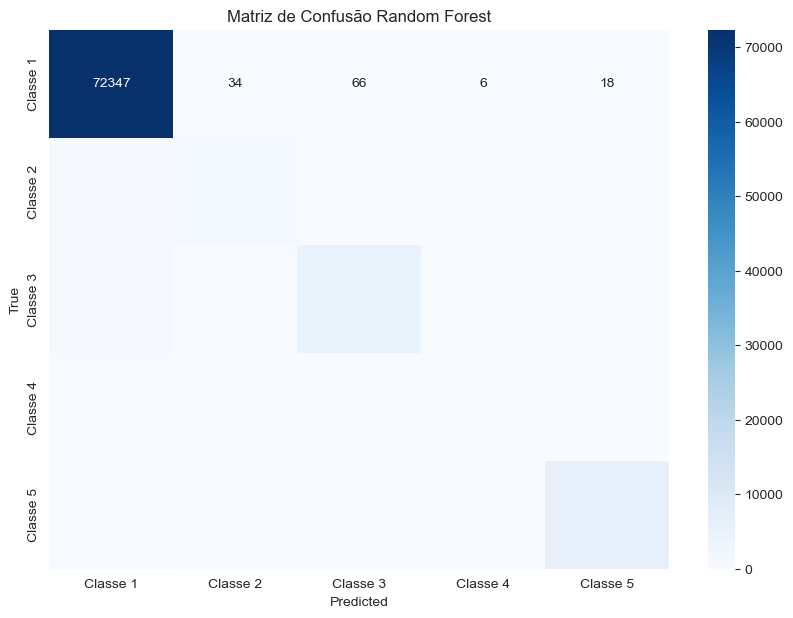

In [35]:
# Gerar e plotar a matriz de confusão
print(f'Matriz de Confusão RandomForest:\n{cm}')
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Classe 1', 'Classe 2', 'Classe 3', 'Classe 4', 'Classe 5'], yticklabels=['Classe 1', 'Classe 2', 'Classe 3', 'Classe 4', 'Classe 5'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Matriz de Confusão Random Forest')
plt.show()

Testando numero de estimators

In [8]:
from sklearn.model_selection import cross_val_score

estimators = list(range(1,100))

cv_scores = []

for i in estimators:
    rf_e = RandomForestClassifier(n_estimators = i)
    scores = cross_val_score(rf_e, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())


Grafico relativo ao MSE (Mean Squared Error)

<Figure size 640x480 with 0 Axes>

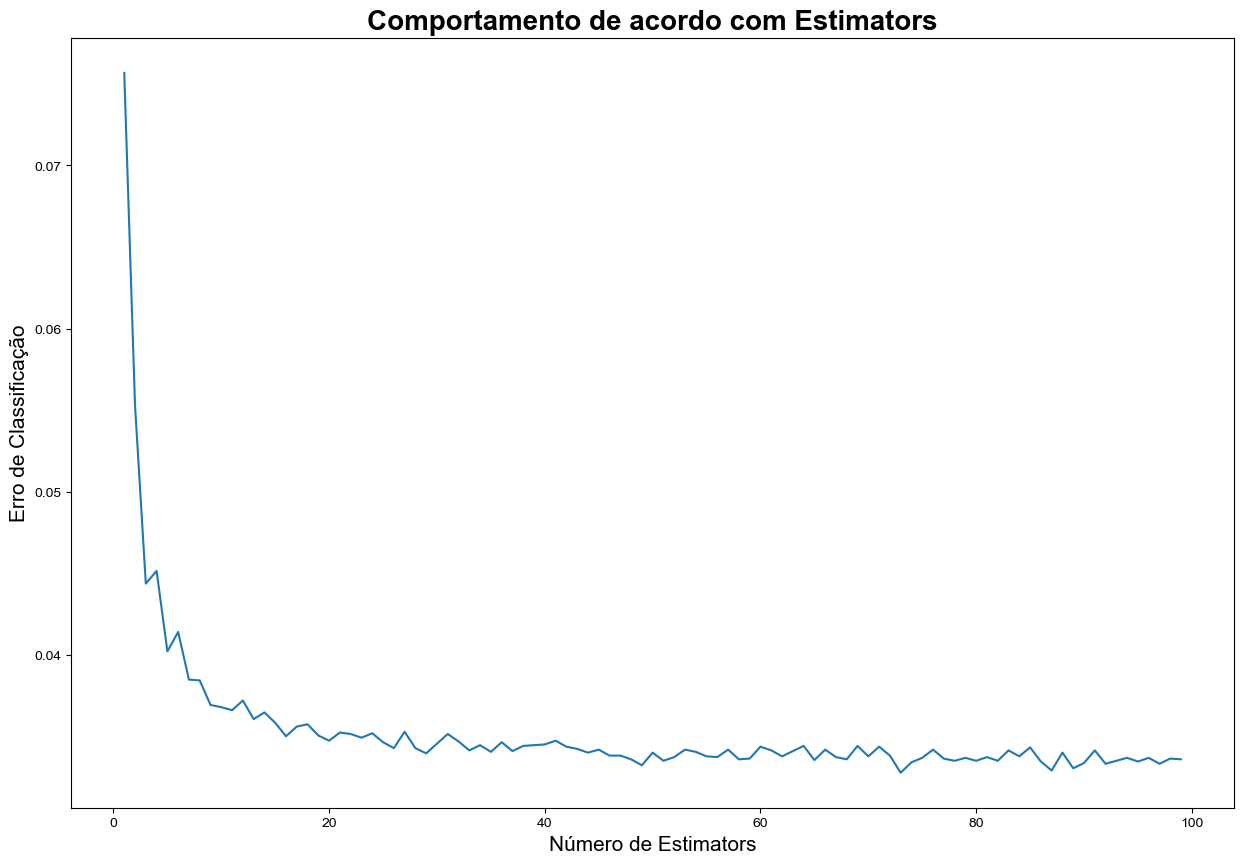

In [9]:
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('Comportamento de acordo com Estimators', fontsize=20, fontweight='bold')
plt.xlabel('Número de Estimators', fontsize=15)
plt.ylabel('Erro de Classificação', fontsize=15)
sns.set_style("whitegrid")
plt.plot(estimators, MSE)
plt.show()

Melhor resultado

In [10]:
best_result = estimators[MSE.index(min(MSE))]
print(f"O melhor valor de estimators é {best_result}")

O melhor valor de estimators é 73


Validação Cruzada dos pesos

In [15]:
weights = list(('balanced','balanced_subsample'))

cv_scores_w = []

for i in weights:
    rf_w = RandomForestClassifier(n_estimators = 73, class_weight = i)
    scores = cross_val_score(rf_w, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores_w.append(scores.mean())

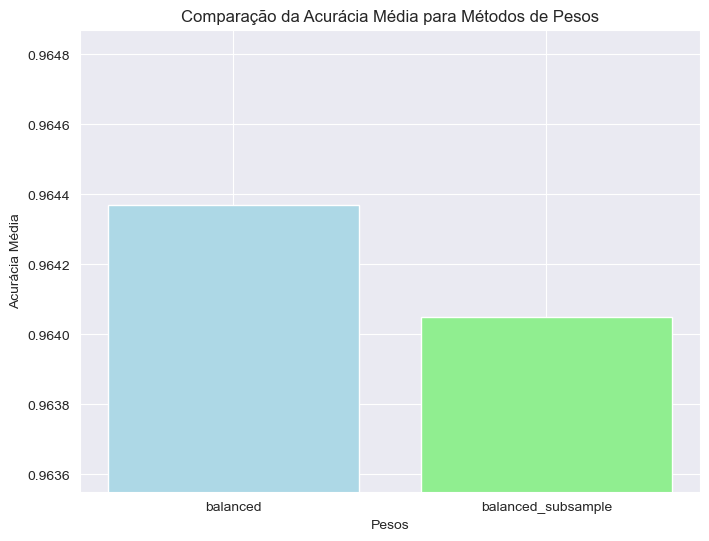

In [31]:
# Criando o histograma
plt.figure(figsize=(8, 6))
plt.bar(weights, cv_scores_w, color=['lightblue', 'lightgreen'])
plt.xlabel('Pesos')
plt.ylabel('Acurácia Média')
plt.title('Comparação da Acurácia Média para Métodos de Pesos')
sns.set_style("darkgrid")
plt.ylim([min(cv_scores_w) - 0.0005, max(cv_scores_w) + 0.0005])  # Ajustando os limites para melhor visualização
plt.show()